<a href="https://colab.research.google.com/github/realBarnaby/projects/blob/main/DL_ora2_hf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Házi Feladat
A fentiekben gyakorolt borminősítéses feladatot alakítsuk át osztályozási feladattá, azaz y-t one hot encodingal alakítsuk át és a hozzátartozó modellt is ennek megfelelően alakítsuk át. Legyen 3 rejtett réteg rétegenként 1024 neuronnal, 30%-os dropouttal, korai megállással. A metrika legyen a pontosság! Értékeljük ki a loss-okat!

In [ ]:
# az adatkészlet importálása
import pandas as pd
from sklearn.model_selection import train_test_split

red_wine = pd.read_csv('https://raw.githubusercontent.com/karsarobert/DeepLearning2024/main/red-wine.csv')

In [ ]:
# X, y beállítása
y = red_wine.quality
X = red_wine.drop(['quality'], axis = 1)

In [ ]:
# első felosztás train, teszt halmazokra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, 11)
y_test = tf.keras.utils.to_categorical(y_test, 11)

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# korai megállás
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,                         # minimium amount of change to count as an improvement
    patience=20,                             # how many epochs to wait before stopping
    restore_best_weights=True,
)

# rejtett rétegek(3), neuronok(1024) és kiesés(30%) beállítása
model = keras.Sequential([

    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

# gradiens süllyedéshez optimalizáló algoritmus kiválasztása
model.compile(
    optimizer='adam',
    loss='mae',
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# modell illesztése
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],        # put your callbacks in a list
    verbose=1,                         # 0 turn off training log
)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - loss: 1.3451 - val_loss: 4.0611
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 1.0945 - val_loss: 2.2298
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - loss: 0.9529 - val_loss: 0.3483
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.8778 - val_loss: 2.7967
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.7849 - val_loss: 0.4213
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.7173 - val_loss: 1.7363
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.6627 - val_loss: 0.8684
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.6125 - val_loss: 0.3697
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.6089 - val_loss: 1.4496
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.5791 - val_loss: 0.6765
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.5298 - val_loss: 0.5699
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.5

Minimum validation loss: 0.09818840771913528


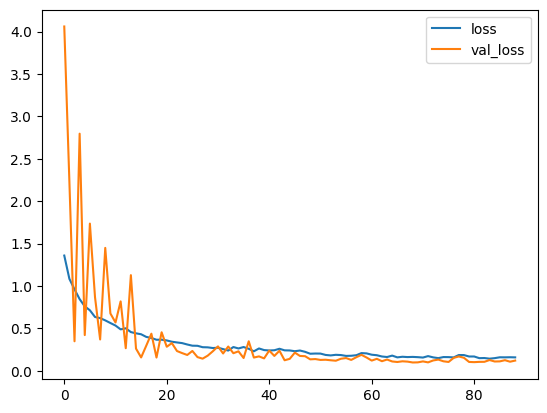

In [ ]:
# a veszteségek vizualizálása
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))